# Kaitlyn's Metric- Student Enrollment in Pittsburgh Neighborhoods

In [2]:
import pandas as pd
import geopandas as gd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Dataset

The dataset I chose was from the WPRDC. This dataset shows the numbers of student enrollment in different Pittsburgh neighborhoods. Here I am inserting the CSV to be read for my future data analysis.

In [3]:
kidPopulation = pd.read_csv("https://data.wprdc.org/dataset/3cb2b9c2-66e2-4ffa-b0a1-35fb2c6f7230/resource/eb1f8714-e0eb-4614-acfe-dfe0ebab942f/download/school-enrollment-by-detailed-level-of-school-for-the-population-3-years-and-over", 
                    index_col="Neighborhood", 
                    parse_dates=True) #import data set for student enrollment


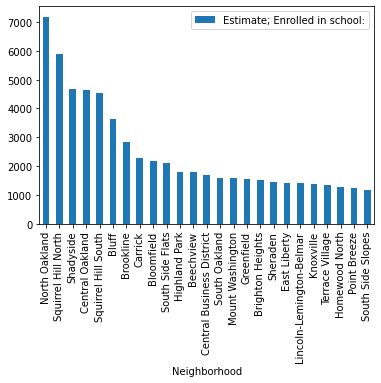

In [4]:
studentEnrollment=pd.DataFrame(kidPopulation["Estimate; Enrolled in school:"])

sE=studentEnrollment.sort_values("Estimate; Enrolled in school:", ascending=False)
#orders the neighborhoods in order of highest to lowest in terms of school enrollment numbers

sE.head(25).plot.bar()
#create a bar graph to depict best neighborhoods in the matter before standardization

I first wanted to begin by showing a raw chart of the data without any form of standardization. I wanted people to be able to see how the data changes once it is standardized. In this example, the bar graph shows the "best enrollment" neighborhoods initially. North Oakland, Squirrel Hill North, Shadyside, and Central Oakland are among the best. 

In the next steps, I am standardizing my data by creating a ratio between the estimated total population and the estimated about of the population who is enrolled in school. My data set was lucky enough to have each of these columns, which saved me from having to merge datasets in this part. First, I create the ratio by dividing the amount enrolled in school by the entire population. In order to make this a little more clear, I used a multiplier of 1000 to get some larger numbers.

Then, I had to drop columns before and after the columns I wanted to highlight. I wanted it to be clear the point I am trying to make and this was the most successful way to do so. As you can see, this dataset required many columns to be dropped. 

In [8]:
kidPopulation["ratio_to_population"]=kidPopulation["Estimate; Enrolled in school:"]/kidPopulation["Estimate; Total:"]*1000
#creates a ratio between the amount of people enrolled in school versus the entire population recorded

population=kidPopulation.drop(columns = ["Id", "Margin of Error; Total:"])
#drops the initial two columns before estimate enrolled in school that are not needed in depiction

populationRatio=population.drop(columns = ["Margin of Error; Enrolled in school:", 
                                           "Estimate; Enrolled in school: - Enrolled in nursery school, preschool", 
                                           "Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool", 
                                           "Estimate; Enrolled in school: - Enrolled in kindergarten", 
                                           "Margin of Error; Enrolled in school: - Enrolled in kindergarten",
                                           "Estimate; Enrolled in school: - Enrolled in grade 1", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 1", 
                                           "Estimate; Enrolled in school: - Enrolled in grade 2",
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 2", 
                                           "Estimate; Enrolled in school: - Enrolled in grade 3", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 3", 
                                           "Estimate; Enrolled in school: - Enrolled in grade 4", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 4", 
                                           "Estimate; Enrolled in school: - Enrolled in grade 5", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 5", 
                                           "Estimate; Enrolled in school: - Enrolled in grade 6", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 6",
                                           "Estimate; Enrolled in school: - Enrolled in grade 7", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 7", 
                                           "Estimate; Enrolled in school: - Enrolled in grade 8",
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 8",
                                           "Estimate; Enrolled in school: - Enrolled in grade 9", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 9",
                                           "Estimate; Enrolled in school: - Enrolled in grade 10",
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 10",
                                           "Estimate; Enrolled in school: - Enrolled in grade 11",
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 11",
                                           "Estimate; Enrolled in school: - Enrolled in grade 12", 
                                           "Margin of Error; Enrolled in school: - Enrolled in grade 12",
                                           "Estimate; Enrolled in school: - Enrolled in college, undergraduate years",
                                           "Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years",
                                           "Estimate; Enrolled in school: - Graduate or professional school",
                                           "Margin of Error; Enrolled in school: - Graduate or professional school",
                                           "Estimate; Not enrolled in school",
                                           "Margin of Error; Not enrolled in school"])
#drops the rest of the columns that are unneeded before ratio to population

populationRatio.head()
#calls the data in a table for showing

,Estimate; Total:,Estimate; Enrolled in school:,ratio_to_population
Neighborhood,,,
Allegheny Center,1389.0,394.0,283.657307
Allegheny West,343.0,61.0,177.842566
Allentown,2520.0,965.0,382.936508
Arlington,1823.0,427.0,234.229292
Arlington Heights,213.0,40.0,187.793427


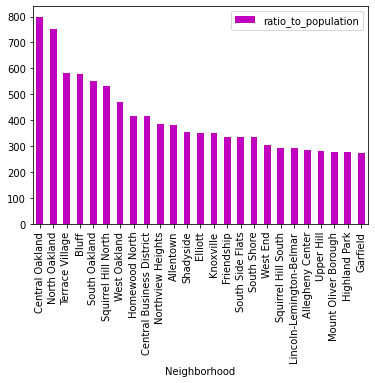

In [7]:
ratio=pd.DataFrame(populationRatio["ratio_to_population"])

graphRatio=ratio.sort_values("ratio_to_population", ascending=False)
#sorts values so that they are in ascending order from highest to lowest ratio value

graphRatio.head(25).plot.bar(color = "m")
#calls a bar graph for the top 25 neighborhoods

This bar graph is exactly the same technique as the first one I created. However, now it is more accurate standardized data. This is the best way for us to be able to view which neighborhoods have the best school enrollment ratio. The higher the number, the better the enrollment per population is. There are some similiarities between this graph and the other such as Central Oakland and North Oakland both still being here. With that being said, there are some new neighborhoods here like Bluff, South Oakland, and Terrace Village that we could not have accurately represented withtout that extra step in creating the ratio.







For the final part of data analysis, I created this map. In the map, the yellow-orange represents the best neighborhoods for enrollment. The pink/purple that represents most of the map, depicts the more average neighborhoods that may be okay, but also do not stand out in anyway. The dark purple and black show the worst neighborhoods that would not be the best environment for an abudnace of education opportunities. 

The map is show here:

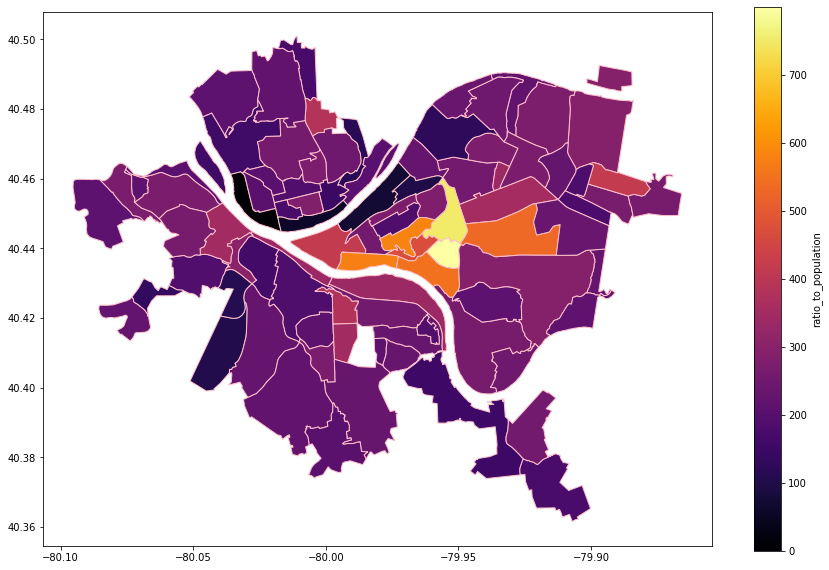

In [9]:
neighborhoods = gd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/dbd133a206c")
#import reading the neighborhood csv

school_map=neighborhoods.merge(kidPopulation, how = "left", left_on = "hood", right_on = "Neighborhood") 
#merge the kidPopulation data with the neighborhood map


#display of map
school_map.plot(column="ratio_to_population",
               cmap = "inferno",
               edgecolor = "pink", 
               legend = True,
               legend_kwds = {"label" : "ratio_to_population"}, 
               figsize = (15, 10))
#creates map in terms of ratio to population variable

# Conclusion

Throughout my data analysis, I was trying to determine which neighborhood in Pittsburgh would have the best showing for student enrollment in schools throughout the city. I thought this was an interesting metric as highest enrollment in schools often correlates to a more fruitful and educated environment for children. To deteremine this, I needed to standardize my data knowing that simply which neighborhood had the highest would not being telling enough. I made a ratio between the estimated total population and the estimate of student enrolled in school in order to maek a final determinations. 
Based on this data the top 5 nieghborhoods for school enrollment are:
1. Central Oakland
2. North Oakland
3. Terrace Village
4. Bluff
5. South Oakland

Some of these neighborhoods being in the top 5 were not surprising to me as a student here at Pitt. I think it is very known that there are a multitude of highly rated institutes in this area including undergraduate, gradutae, high school, and so on.